# Simple EDA Notebook

### 1. 경로 수정

In [13]:
import os
os.chdir("/opt/ml/github/EDA")

In [3]:
!pwd

/opt/conda/envs/nlp


### 2. 라이브러리 Import

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 3. Data 불러오기

In [15]:
train_dir = '../NLP_dataset/train/train.csv'
test_dir = '../NLP_dataset/test/test_data.csv'
train_dataset = pd.read_csv(train_dir)
test_dataset = pd.read_csv(test_dir)

In [17]:
train_dataset.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


### 4. 데이터 체크

In [18]:
train_data = train_dataset.iloc[0]

print(f"Sentence: {train_data['sentence']}")
print(f"Subject_entity: {train_data['subject_entity']}")
print(f"Object_entity: {train_data['object_entity']}")
print(f"Label: {train_data['label']}")
print(f"Source: {train_data['source']}")

print(train_dataset.shape)
print(test_dataset.shape)

Sentence: 〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.
Subject_entity: {'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}
Object_entity: {'word': '조지 해리슨', 'start_idx': 13, 'end_idx': 18, 'type': 'PER'}
Label: no_relation
Source: wikipedia
(32470, 6)
(7765, 6)


In [19]:
print(train_dataset['label'].unique())

['no_relation' 'org:member_of' 'org:top_members/employees'
 'org:alternate_names' 'per:date_of_birth' 'org:place_of_headquarters'
 'per:employee_of' 'per:origin' 'per:title' 'org:members'
 'per:schools_attended' 'per:colleagues' 'per:alternate_names'
 'per:spouse' 'org:founded_by' 'org:political/religious_affiliation'
 'per:children' 'org:founded' 'org:number_of_employees/members'
 'per:place_of_birth' 'org:dissolved' 'per:parents' 'per:religion'
 'per:date_of_death' 'per:place_of_residence' 'per:other_family'
 'org:product' 'per:siblings' 'per:product' 'per:place_of_death']


In [55]:
import pickle

def label_to_num(x):
    with open('dict_label_to_num.pkl', 'rb') as f:
        dict_label_to_num = pickle.load(f)
    return dict_label_to_num[x]

In [56]:
train_dataset['label_num'] = train_dataset['label'].map(lambda x: label_to_num(x))
train_dataset

,id,sentence,subject_entity,object_entity,label,source,label_num
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,0
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,0
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,20
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,1
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,0
...,...,...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree,6
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '손병희', 'start_idx': 17, 'end_idx': 19...",per:colleagues,wikipedia,14
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...",org:top_members/employees,wikitree,1
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...",no_relation,wikipedia,0


### 5. 데이터 빈도 체크

Text(0.5, 1.0, 'Train Label')

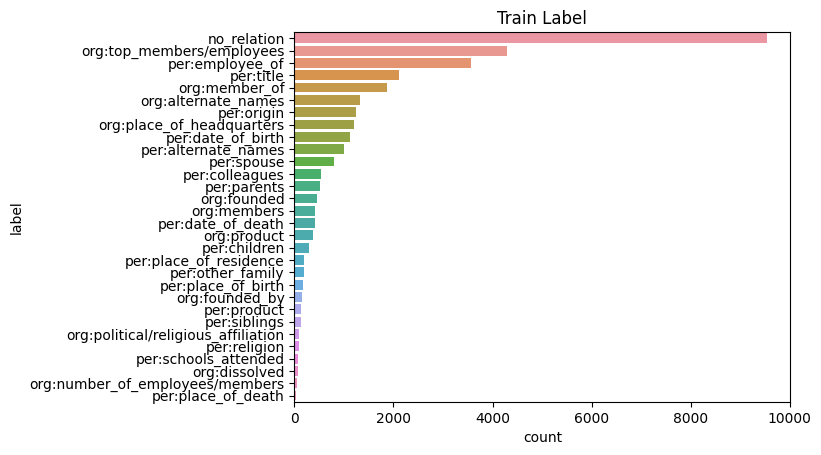

In [24]:
sns.countplot(y=train_dataset['label'], order = train_dataset['label'].value_counts().index).set_title('Train Label')

Text(0.5, 1.0, 'Test Source')

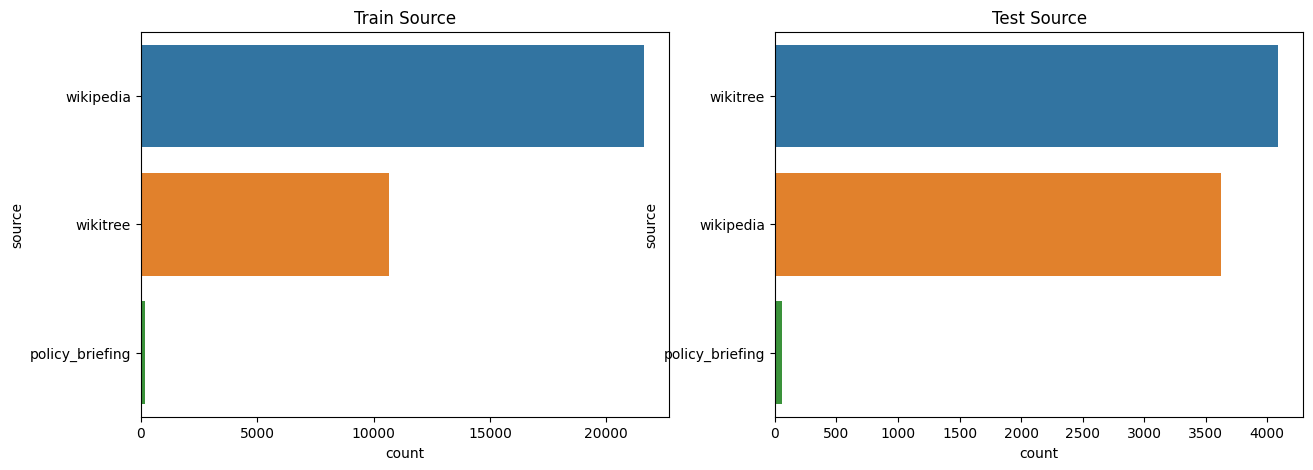

In [23]:
fig,ax = plt.subplots(ncols=2, figsize=(15,5))
sns.countplot(y=train_dataset['source'], ax=ax[0]).set_title("Train Source")
sns.countplot(y=test_dataset['source'], ax=ax[1]).set_title("Test Source")

In [31]:
train_subject_entity_type = [eval(e)['type'] for e in train_dataset['subject_entity']]
train_object_entity_type= [eval(e)['type'] for e in train_dataset['object_entity']]
test_subject_entity_type = [eval(e)['type'] for e in test_dataset['subject_entity']]
test_object_entity_type= [eval(e)['type'] for e in test_dataset['object_entity']]

Text(0.5, 1.0, 'Test Object Entity')

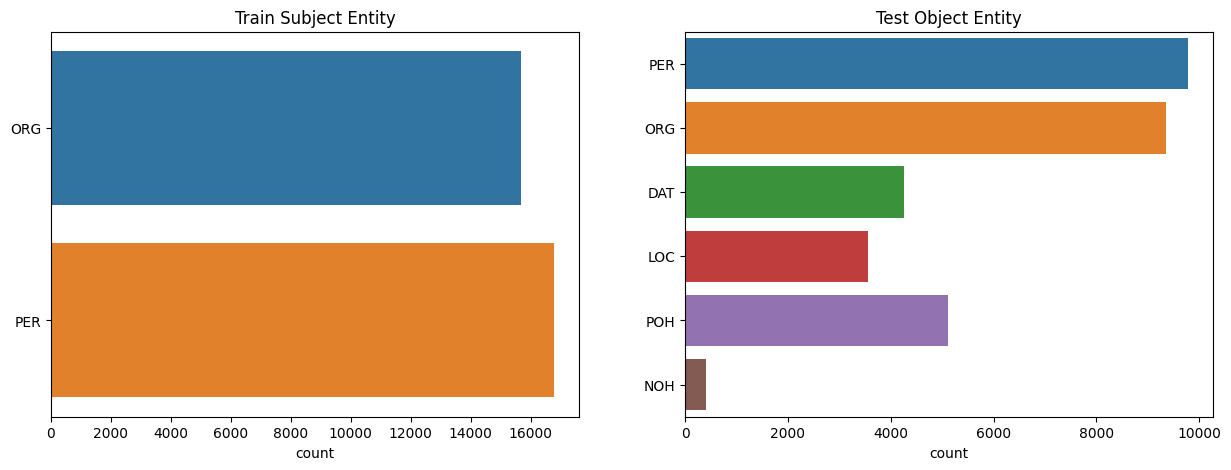

In [35]:
fix, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.countplot(y=train_subject_entity_type, ax=ax[0]).set_title("Train Subject Entity")
sns.countplot(y=train_object_entity_type, ax=ax[1]).set_title("Test Object Entity")

Text(0.5, 1.0, 'Test Object Entity')

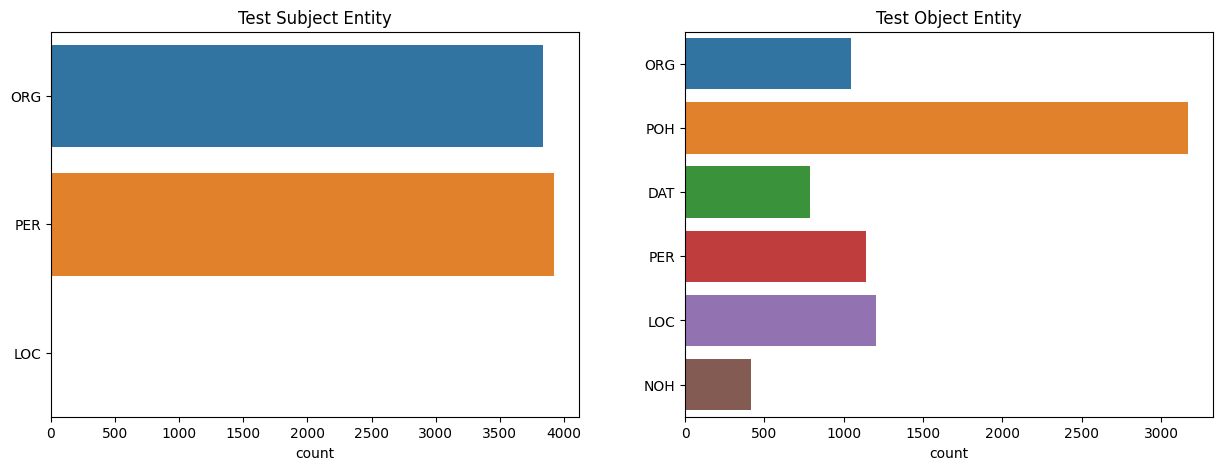

In [34]:
fix, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.countplot(y=test_subject_entity_type, ax=ax[0]).set_title("Test Subject Entity")
sns.countplot(y=test_object_entity_type, ax=ax[1]).set_title("Test Object Entity")

In [36]:
train_sentence_length = [len(e) for e in train_dataset['sentence']]
test_sentence_length = [len(e) for e in test_dataset['sentence']]

Text(0.5, 1.0, 'Test Sentence Length')

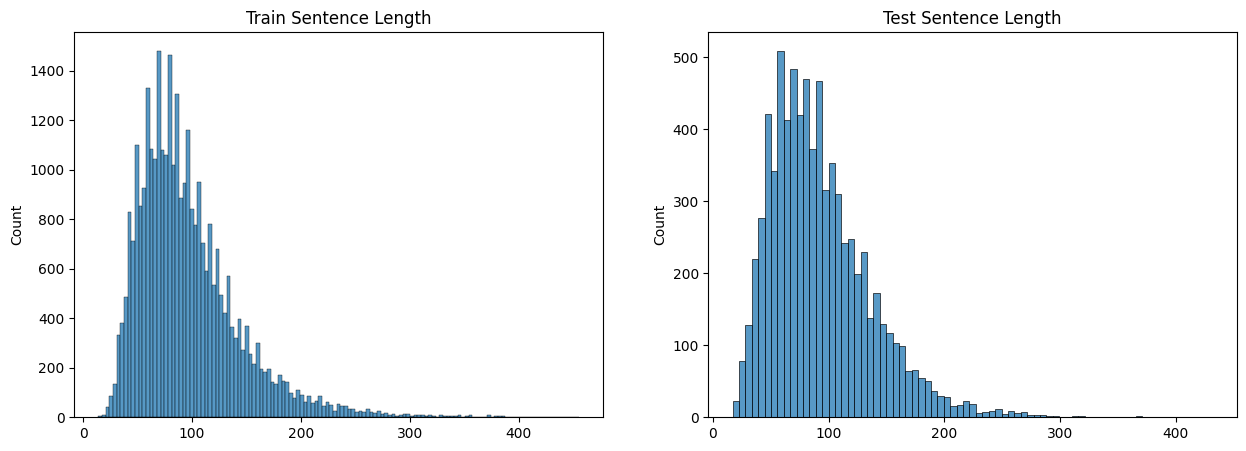

In [37]:
fix, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(train_sentence_length, ax=ax[0]).set_title("Train Sentence Length")
sns.histplot(test_sentence_length, ax=ax[1]).set_title("Test Sentence Length")

In [52]:
max_length = max(len(l) for l in train_dataset['sentence'])
avg_length = sum(map(len, train_dataset['sentence'])) / len(train_dataset['sentence'])
print(f'Max Length: {max_length}')
print(f'Avg Legnth: {avg_length}')

Max Length: 455
Avg Legnth: 97.08395441946412


In [41]:
duplicated = train_dataset[train_dataset.duplicated(['sentence', 'subject_entity','object_entity']) == True]
duplicated_with_label = train_dataset[train_dataset.duplicated(['sentence', 'subject_entity', 'object_entity', 'label']) == True]

print(len(duplicated))
print(len(duplicated_with_label))

47
42


In [47]:
dup = train_dataset.drop_duplicates(['sentence', 'subject_entity', 'object_entity'], keep='first')
dup_with_label = train_dataset.drop_duplicates(['sentence', 'subject_entity', 'object_entity', 'label'], keep='first')